<a href="https://colab.research.google.com/github/Matinnorouzi2023/Digital-Twin/blob/main/Step_by_Step_Development_for_Wind_Power_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries
# Import necessary libraries for data processing, visualization, machine learning, and optimization.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install pulp
import pulp

# Set plot styles for better visuals


In [16]:
sns.set(style="whitegrid")

## 2. Data Preparation
# Load dataset (replace 'DT_WT.csv' with the actual dataset path).

In [17]:
df = pd.read_csv('DT_WT.csv')
print("Dataset Shape:", df.shape)
print("Dataset Preview:")
print(df.head())

Dataset Shape: (40058, 5)
Dataset Preview:
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


# Filter out invalid or missing data


In [18]:
df = df[df['LV ActivePower (kW)'] > 0]
df = df.dropna()

# Normalize features for ML models


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']
data_processed = scaler.fit_transform(df[features])
print("Processed Data Sample:")
print(data_processed[:5])

Processed Data Sample:
[[-0.87988242  1.70238309 -1.04070767]
 [-0.78435611  1.80259878 -0.96200288]
 [-0.90511194  1.84807695 -1.06002809]
 [-0.78766341  1.83293136 -0.96488241]
 [-0.80930146  1.76821115 -0.98343979]]


## 3. Data Visualization
# Pairplot to visualize relationships between variables

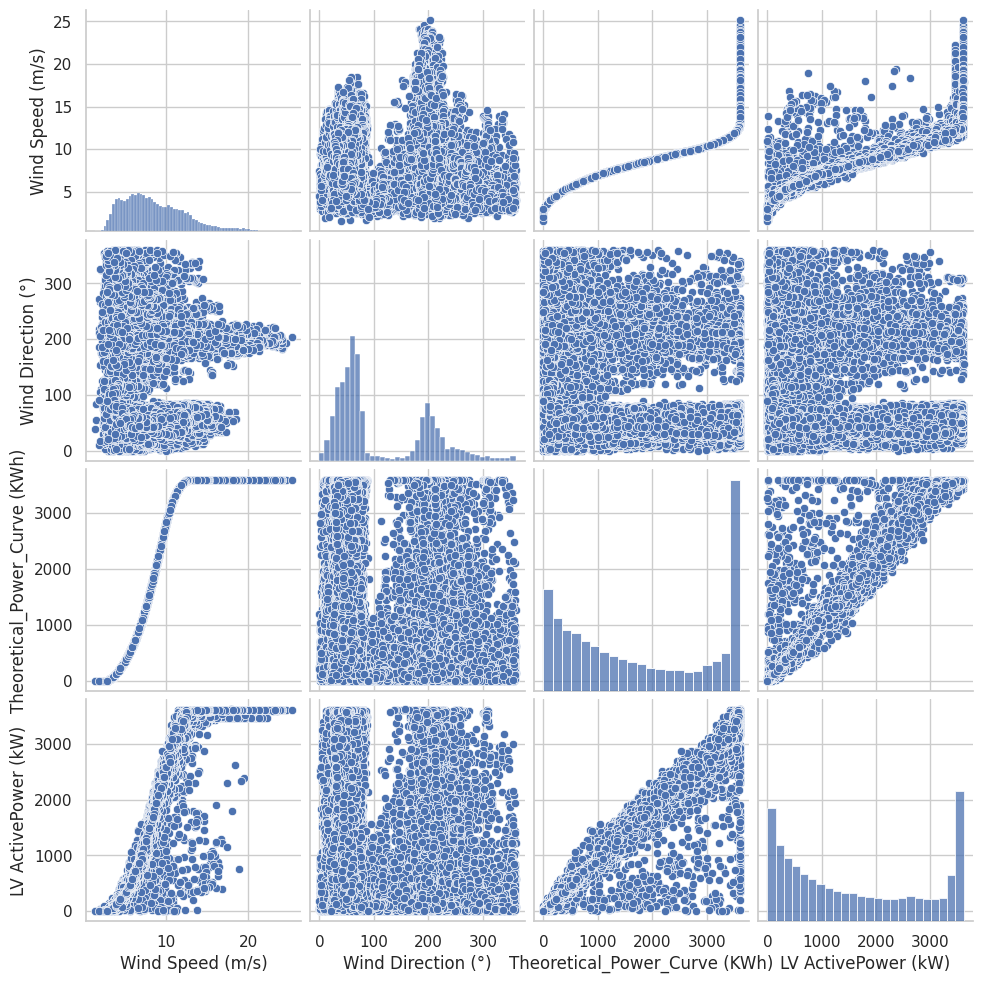

In [20]:
sns.pairplot(data=df, vars=features + ['LV ActivePower (kW)'])
plt.savefig('pairplot.png')

# Scatterplot for wind speed vs active power

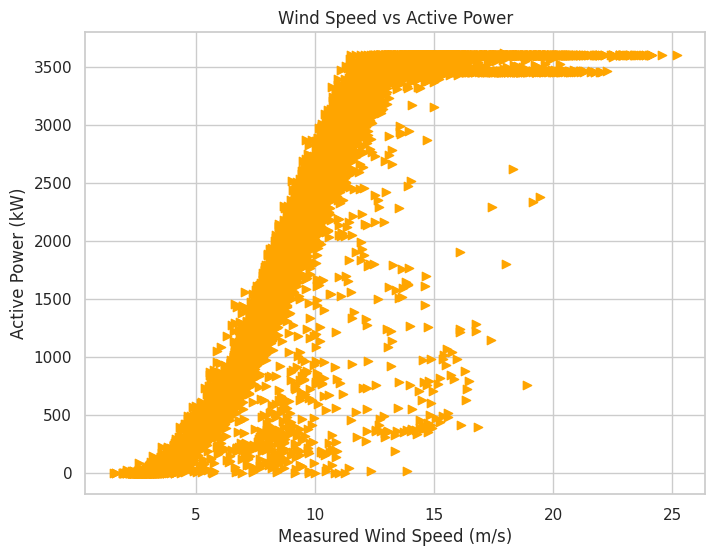

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], color='orange', marker='>')
plt.xlabel('Measured Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.title('Wind Speed vs Active Power')
plt.savefig('scatterplot_wind_vs_power.png')
plt.show()

## 4. Basic Linear Regression Model
# Split data into training and testing sets

In [22]:
x = data_processed
y = df['LV ActivePower (kW)']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)

# Train linear regression model


In [23]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

# Print model coefficients and intercept

In [24]:
print("Linear Regression Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Linear Regression Coefficients: [ 175.79333598   22.37428192 1074.92727974]
Intercept: 1623.5476330176136


# Predict and evaluate the model


In [25]:
y_pred = lr_model.predict(x_test)
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
Mean Squared Error: 65890.2089289041
Mean Absolute Error: 130.82713994058037
R2 Score: 0.9584721926396892


## 5. Advanced Neural Network Model for Prediction
# Build and compile a simple neural network model

In [26]:
nn_model = Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the neural network

In [27]:
nn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Predict using the neural network
y_pred_nn = nn_model.predict(x_test)
print("Neural Network Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_nn))
print("R2 Score:", r2_score(y_test, y_pred_nn))


Epoch 1/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2750145.7500 - val_loss: 102408.1484
Epoch 2/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 85495.6719 - val_loss: 69200.3438
Epoch 3/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 62883.3711 - val_loss: 65574.9688
Epoch 4/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 64561.1406 - val_loss: 64873.0781
Epoch 5/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 61895.4609 - val_loss: 64544.6797
Epoch 6/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 67284.4297 - val_loss: 64675.2734
Epoch 7/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 63057.6172 - val_loss: 64446.0117
Epoch 8/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 61464.4492 - val_loss: 64396.6250
Epoch 9/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 62925.8516 - val_loss: 65335.2070
Epoch 10/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 57527.2578 - val_loss: 64181.0352
Epoch 11/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - l

## 6. Optimization for Wind Power Bidding Strategy
# Define optimization problem

In [28]:
prob = pulp.LpProblem("Wind_Power_Strategy", pulp.LpMaximize)


# Decision variables (e.g., power production levels)


In [29]:
wind_power = pulp.LpVariable("wind_power", 0, 3000)  # Limits: 0 to 3000 MW

# Objective function (maximize profit)


In [50]:
import cvxpy as cp

# تعریف متغیرها
wind_power = cp.Variable(nonneg=True)

# پارامترها
profit_per_mw = 0.8  # سود هر مگاوات
loss_per_mw2 = 0.2  # ضرر درجه دوم هر مگاوات

# تعریف متغیر wind_power_squared به عنوان مربع wind_power
wind_power_squared = wind_power**2

# تابع هدف
objective = cp.Maximize(profit_per_mw * wind_power - loss_per_mw2 * wind_power_squared)

# قیود
constraints = []

# مدل
prob = cp.Problem(objective, constraints)

# حل مسئله
prob.solve()

# چاپ نتایج
if prob.status == cp.OPTIMAL:  # If the problem is solved successfully
    print("Optimal Wind Power Production:", wind_power.value, "MW")
    print("Profit:", objective.value)
else:
    print("No solution found.")


Optimal Wind Power Production: 2.0 MW
Profit: 0.8


# Solve the optimization problem


In [51]:
prob.solve()


0.8

# Print results


In [54]:
print("Optimal Wind Power Production:", wind_power.value, "MW")


Optimal Wind Power Production: 2.0 MW


## 7. Sensitivity Analysis and Scenario Testing
# Define scenarios for wind speed and market prices

In [55]:
scenarios = pd.DataFrame({
    'Wind Speed (m/s)': [10.5, 7.0, 3.0],
    'Market Price (€/MWh)': [50, 40, 30],
    'Capacity (MW)': [2000, 1500, 500]
})

# Example calculation for profitability under different scenarios


In [56]:
scenarios['Profit'] = scenarios['Market Price (€/MWh)'] * scenarios['Capacity (MW)']
print("Scenario Analysis Results:")
print(scenarios)


Scenario Analysis Results:
   Wind Speed (m/s)  Market Price (€/MWh)  Capacity (MW)  Profit
0              10.5                    50           2000  100000
1               7.0                    40           1500   60000
2               3.0                    30            500   15000


## 8. Conclusion and Next Steps
# - These steps provide a baseline for wind power analysis and optimization.
# - Extend models to include real market data and advanced machine learning models.
# - Incorporate additional constraints and real-world complexities into optimization.